<a href="https://colab.research.google.com/github/Sidhchamp1/Covid-19/blob/main/test_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hypothesis: Countries with higher vaccination rates saw a statistically significant reduction in deaths per confirmed case (case fatality ratio) compared to countries with lower vaccination rates.

COVID RECOVERY

In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Load the dataset
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
covid_recovery_df = pd.read_csv(url)
covid_recovery_df



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#get all dat columns in separate df
date_df = covid_recovery_df.iloc[:,4:]
date_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#convert dates to proper date time format
date_df.columns = pd.to_datetime(date_df.columns)
date_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#group columns by year and aggregate
date_df = date_df.groupby(date_df.columns.year, axis=1).sum()
date_df.head()

,2020,2021,2022,2023
0,5998314,12291566,0,0
1,1999772,20652880,0,0
2,7142836,18527397,0,0
3,553171,2532478,0,0
4,649173,5246627,0,0


In [5]:
#make a copy of date_df and add back the first 4 columns of the original df
df = date_df.copy()
df

,2020,2021,2022,2023
0,5998314,12291566,0,0
1,1999772,20652880,0,0
2,7142836,18527397,0,0
3,553171,2532478,0,0
4,649173,5246627,0,0
...,...,...,...,...
269,6750134,50858639,0,0
270,0,0,0,0
271,220558,551939,0,0
272,2229469,19623327,0,0


COVID GLOBAL CASES

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score


url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_Cases_global_df = pd.read_csv(url)
covid_Cases_global_df.head()





,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
#get all dat columns in separate df
date_df = covid_Cases_global_df.iloc[:,4:]
date_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
date_df.columns = pd.to_datetime(date_df.columns)
date_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [7]:
date_df = date_df.groupby(date_df.columns.year, axis=1).sum()
date_df.head()

,2020,2021,2022,2023
0,8501751,39518380,67783564,14184774
1,3727544,51106141,108004674,22724295
2,10583375,57172988,96532073,18453214
3,682822,5084330,15527738,3252635
4,1343410,14797145,36733077,7151571


In [8]:
df = date_df.copy()
df

,2020,2021,2022,2023
0,8501751,39518380,67783564,14184774
1,3727544,51106141,108004674,22724295
2,10583375,57172988,96532073,18453214
3,682822,5084330,15527738,3252635
4,1343410,14797145,36733077,7151571
...,...,...,...,...
284,8753200,115974691,239996301,47819504
285,0,0,178082,36380
286,382306,2403947,4280922,812260
287,2433883,52593029,117791992,23134779


COVID DEATHS GLOBAL

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score


url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid_Deaths_global_df = pd.read_csv(url)
covid_Deaths_global_df.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [7]:
#get all dat columns in separate df
date_df = covid_Deaths_global_df.iloc[:,4:]
date_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,0,0,0,0,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [8]:
#convert dates to proper date time format
date_df.columns = pd.to_datetime(date_df.columns)
date_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [9]:
#group columns by year and aggregate
date_df = date_df.groupby(date_df.columns.year, axis=1).sum()
date_df.head()

,2020,2021,2022,2023
0,296447,1778958,2810220,535810
1,88375,871276,1281171,244558
2,377806,1563862,2491699,467908
3,15492,44641,55837,11220
4,36818,368673,695036,131307


In [10]:
#make a copy of date_df and add back the first 4 columns of the original df
df = date_df.copy()
df

,2020,2021,2022,2023
0,296447,1778958,2810220,535810
1,88375,871276,1281171,244558
2,377806,1563862,2491699,467908
3,15492,44641,55837,11220
4,36818,368673,695036,131307
...,...,...,...,...
284,74921,1251129,2040515,388144
285,0,0,0,0
286,108944,480906,778784,146812
287,53042,849928,1453709,275043


This is the code for visualizing the correlation between recovery and the number of deaths per year: it demonstrates that there were no recoveries but there were a lot of deaths noticed as well

Global Recoveries: 0
Global Deaths: 6881802


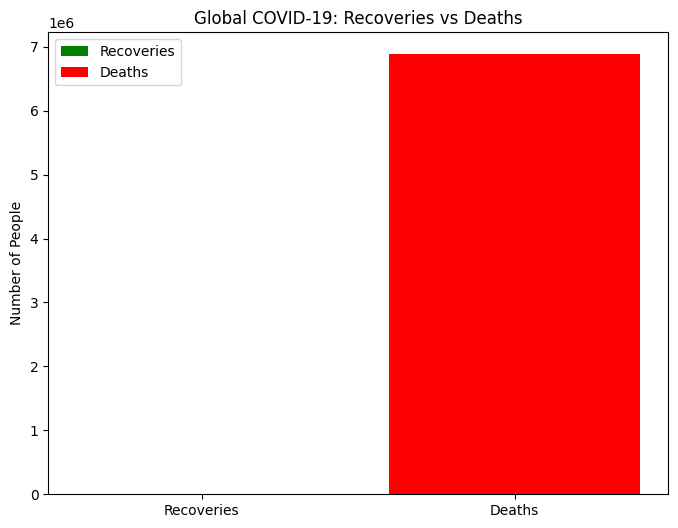

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
recovery_df = pd.read_csv(url_recovered)

url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(url_deaths)

# --- Group & Sum ---
# Remove Lat/Long and sum all countries
recovery_df = recovery_df.drop(columns=["Lat", "Long"])
deaths_df = deaths_df.drop(columns=["Lat", "Long"])

# Latest date columns
latest_date_recovered = recovery_df.columns[-1]
latest_date_deaths = deaths_df.columns[-1]

# Sum all countries (or provinces) globally
total_recoveries = recovery_df[latest_date_recovered].sum()
total_deaths = deaths_df[latest_date_deaths].sum()

print(f"Global Recoveries: {total_recoveries}")
print(f"Global Deaths: {total_deaths}")

# --- Make a simple bar chart ---
plt.figure(figsize=(8,6))

# Make the bar chart and save the bars to a variable
bars = plt.bar(["Recoveries", "Deaths"], [total_recoveries, total_deaths], color=['green', 'red'])

# Add a legend (notice the brackets [ ])
plt.legend([bars[0], bars[1]], ["Recoveries", "Deaths"])

plt.ylabel("Number of People")
plt.title("Global COVID-19: Recoveries vs Deaths")
plt.show()



This is the code for visualizing the correlation between deaths and the number of cases per year:

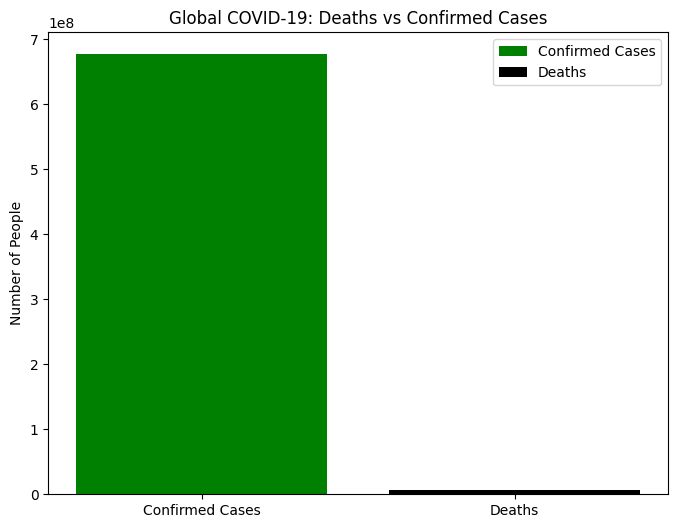

In [12]:


# --- Visualization ---
plt.figure(figsize=(8, 6))

bars = plt.bar(["Confirmed Cases", "Deaths"], [total_cases, total_deaths], color=['green', 'black'])

plt.legend([bars[0], bars[1]], ["Confirmed Cases", "Deaths"])

plt.ylabel("Number of People")
plt.title("Global COVID-19: Deaths vs Confirmed Cases")

plt.show()


In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination_df = pd.read_csv(url)
vaccination_df.head()


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [19]:
vaccination_df = vaccination_df.drop(columns=["iso_code"])



KeyError: "['iso_code'] not found in axis"

Visualizing the correlation between the deaths and the vaccinations per country.

In [20]:
vaccination_df = vaccination_df.drop(columns=["iso_code"])

plt.figure(figsize=(8, 6))

bars = plt.bar(["Confirmed Cases", "Deaths"], [total_cases, total_deaths], color=['green', 'black'])

plt.legend([bars[0], bars[1]], ["Confirmed Cases", "Deaths"])

plt.ylabel("Number of People")
plt.title("Global COVID-19: Deaths vs Confirmed Cases")

plt.show()

KeyError: "['iso_code'] not found in axis"